In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import msprime
import numpy as np
import pandas as pd
import glob
from IPython.display import display, SVG

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Useful msprime docs
## https://github.com/jeromekelleher/spg-chapter/tree/master/jupyter

## msprime basic simulation toys

In [44]:
def segregating_sites_example(Ne, n, num_replicates):
    mu = 0.00000222
    S = np.zeros(num_replicates)
    replicates = msprime.simulate(
        Ne=Ne,
        sample_size=n,
#        mutation_rate=theta / (4*Ne),
        mutation_rate=mu,
        num_replicates=num_replicates)
    for j, tree_sequence in enumerate(replicates):
        S[j] = tree_sequence.num_sites
    # Now, calculate the analytical predictions
    theta = 4 * Ne * mu
    S_mean_a = np.sum(1 / np.arange(1, n)) * theta
    S_var_a = (
        theta * np.sum(1 / np.arange(1, n)) +
        theta**2 * np.sum(1 / np.arange(1, n)**2))
    print("              mean              variance")
    print("Observed      {}\t\t{}".format(np.mean(S), np.var(S)))
    print("Analytical    {:.5f}\t\t{:.5f}".format(S_mean_a, S_var_a))
segregating_sites_example(0.5, 10, 100)

              mean              variance
Observed      0.0		0.0
Analytical    0.00001		0.00001


In [ ]:
def pairwise_T_mrca(Ne):
    N = 10000
    T_mrca = np.zeros(N)
    for j, ts in enumerate(msprime.simulate(2, Ne=Ne, num_replicates=N)):
        tree = ts.first()
        T_mrca[j] = tree.time(tree.root)
    return np.mean(T_mrca)

pairwise_T_mrca(0.5), pairwise_T_mrca(1), pairwise_T_mrca(10), pairwise_T_mrca(100)

In [ ]:
## We can show that as the sample size k → ∞, Var(TMRCA)
## converges to 4π^2/3 − 12 ≈ 1.16 (in coalescent units).

## The rate of genetic drift per time unit in the Moran model is equal to 2/N^2,
## therefore we can scale to WF by considering generation time as N time steps.
def pairwise_T_mrca(growth_rate):
    N = 10000
    T_mrca = np.zeros(N)    
    replicates = msprime.simulate(
        population_configurations=[
             msprime.PopulationConfiguration(
                sample_size=5, initial_size=1, growth_rate=growth_rate)], 
        num_replicates=N, random_seed=100)
    for j, ts in enumerate(replicates):
        tree = ts.first()
        T_mrca[j] = tree.time(tree.root)
    return np.mean(T_mrca)

pairwise_T_mrca(.05), pairwise_T_mrca(0), pairwise_T_mrca(-0.05)

## Simple two population model

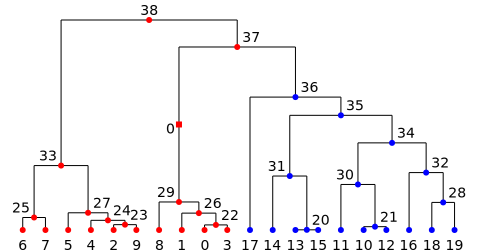

In [6]:
import msprime
def simseq(tdiv=500, size=500, meta_size=500):
    pop_cfgs = []
    pop_meta = msprime.PopulationConfiguration(sample_size = 10, initial_size = meta_size)
    pop_cfgs.append(pop_meta)
    pop_local = msprime.PopulationConfiguration(sample_size = 10, initial_size = size, growth_rate = 0)
    pop_cfgs.append(pop_local)
    split_events = []
    split_event = msprime.MassMigration(time = tdiv + size,\
                    source = 1, destination = 0, proportion = 1)
    local_size_change = msprime.PopulationParametersChange(time = tdiv,\
                                                            initial_size = 1,\
                                                            population_id = 1)
    split_events.append(split_event)
    debug = msprime.DemographyDebugger(population_configurations = pop_cfgs,\
                                        demographic_events = split_events)
    #debug.print_history()
    tree_sequence = msprime.simulate(length = 600,\
                                    mutation_rate = 2e-7,\
                                    population_configurations = pop_cfgs,\
                                    demographic_events = split_events)
    tree = tree_sequence.first()
    colour_map = {0:"red", 1:"blue"}
    node_colours = {u: colour_map[tree.population(u)] for u in tree.nodes()}
    node_labels = {u: (str(u)) for u in tree.nodes()}
    tree.draw(path="/tmp/sp-wat.svg", format='svg', height=250, width=500, node_labels=node_labels, node_colours=node_colours)
    return SVG("/tmp/sp-wat.svg")
simseq()